<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220708.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timezone, timedelta 
import os 
import plotnine as gg 
from plotnine import ggplot, aes

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer 

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, mean_squared_error
import sklearn.datasets as skd

# regressor

In [4]:
raw = skd.fetch_california_housing()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']

In [6]:
x.columns = [a.lower() for a in x.columns]
x.head()

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [14]:
fit_lm = LinearRegression().fit(x_tr, y_tr)
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)

In [18]:
pred_lm = fit_lm.predict(x_te)
pred_rf = fit_rf.predict(x_te)

In [19]:
mean_squared_error(y_te, pred_lm), mean_squared_error(y_te, pred_rf)

(0.5392630505471737, 0.26600354681263644)

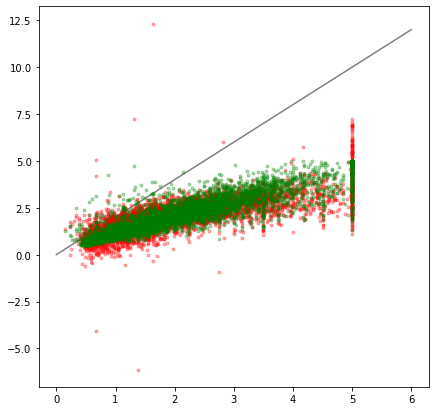

In [20]:
plt.figure(figsize = [7,7])
plt.plot([0,6], [0,12], 'grey')
plt.plot(y_te, pred_lm, '.', color = 'red', alpha = .3)
plt.plot(y_te, pred_rf, '.', color = 'green', alpha = .3)